In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Comparison among Models

In [2]:
with open('./log/configs_1.json', 'r') as f:
    models_metrics = json.load(f)
    
models_metrics

{'model[vectorizer=CountVectorizer, feature_selector=SelectKBest(chi2), classifier=MultinomialNB]@0': [0.7264245251582806,
  0.47886393659180976,
  0.9577278731836195],
 'model[vectorizer=CountVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@0': [0.8487170943018993,
  0.9068692206076618,
  0.8143534994068802],
 'model[vectorizer=CountVectorizer, feature_selector=SelectKBest(mutual_info_classif), classifier=MultinomialNB]@0': [0.7624125291569477,
  0.5468956406869221,
  0.968421052631579],
 'model[vectorizer=CountVectorizer, feature_selector=SelectKBest(mutual_info_classif), classifier=SGDClassifier]@0': [0.8447184271909364,
  0.9266842800528402,
  0.79806598407281],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=MultinomialNB]@0': [0.7294235254915028,
  0.46961690885072654,
  0.9875],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@0': [0.7687437520826391,
  0.5535006605019815

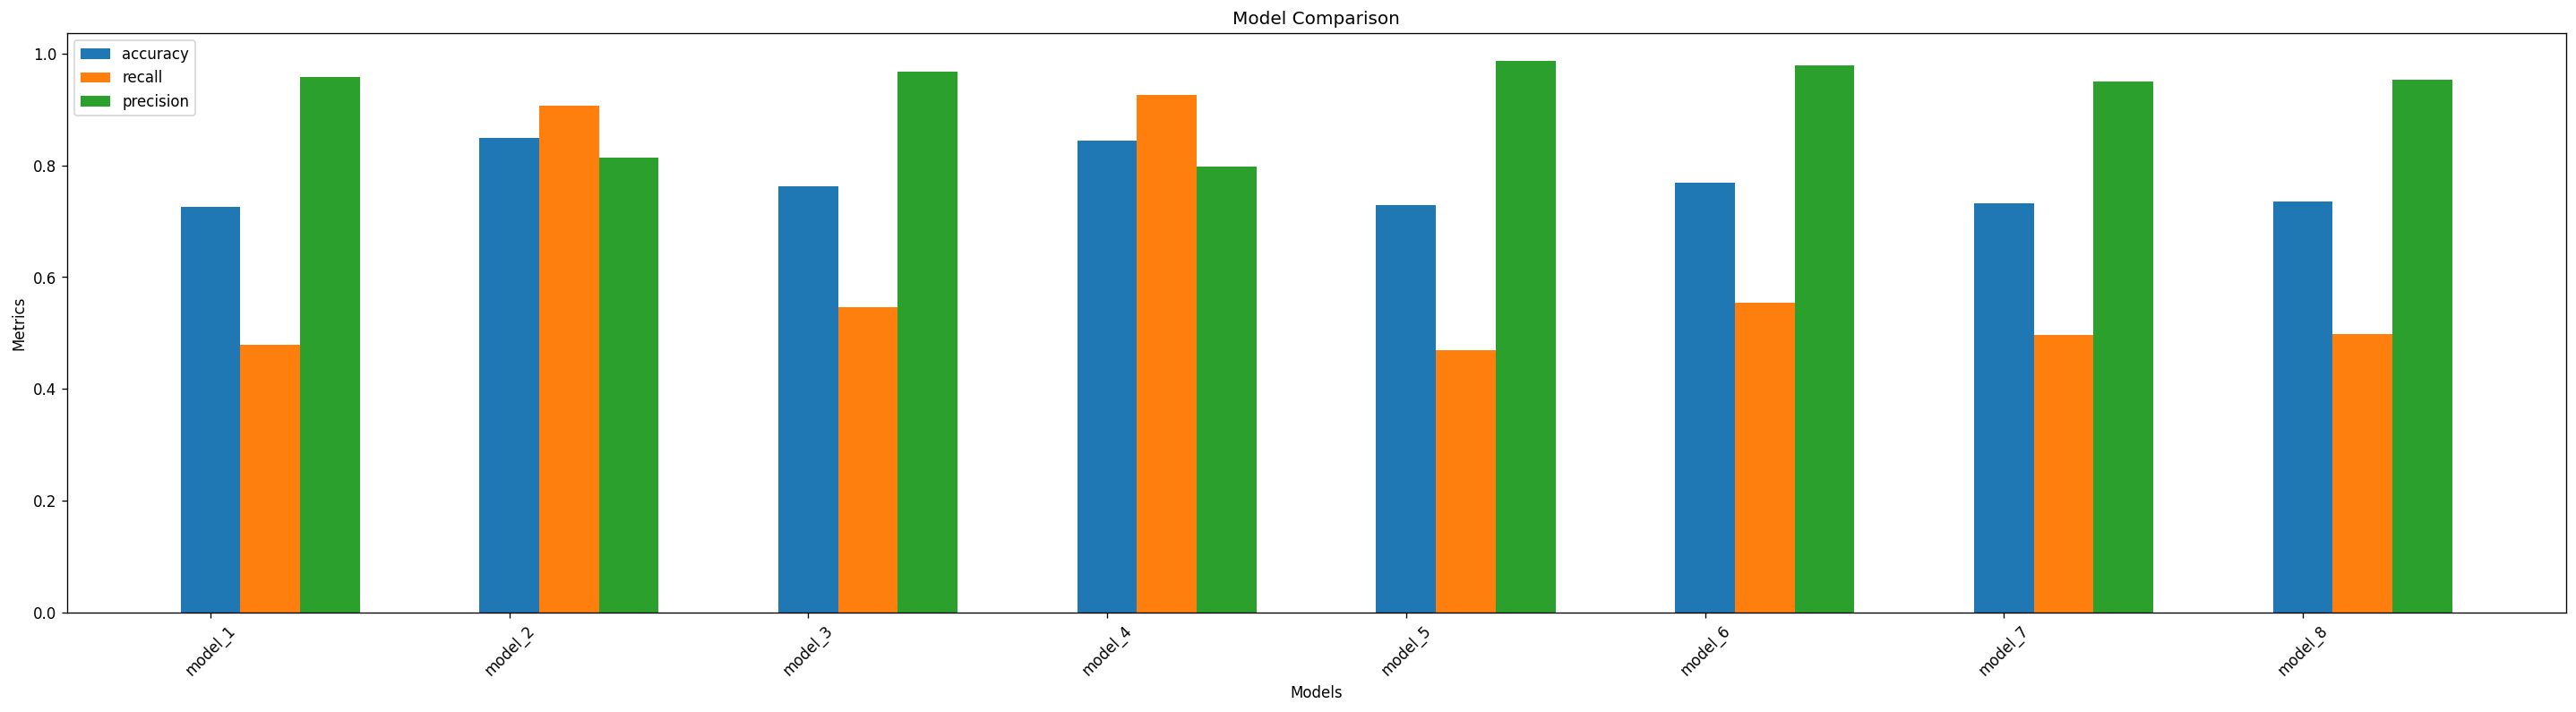

In [3]:
fig, ax = plt.subplots(dpi=120, figsize=(30, 7))
ax.set_title("Model Comparison")

x_ticks = np.arange(len(models_metrics.keys()))
bar_width = 0.2

accuracy = [metrics[0] for metrics in models_metrics.values()]
recall = [metrics[1] for metrics in models_metrics.values()]
precision = [metrics[2] for metrics in models_metrics.values()]

ax.bar(x_ticks, height=accuracy, width=bar_width, label='accuracy')
ax.bar(x_ticks + bar_width, height=recall, width=bar_width, label='recall')
ax.bar(x_ticks + 2*bar_width, height=precision, width=bar_width, label='precision')
    
ax.set_xlabel("Models")
ax.set_ylabel("Metrics")

ax.set_xticks(x_ticks)
ax.set_xticklabels([f"model_{i}" for i in range(1, len(models_metrics.keys())+1)], rotation=45)
ax.legend()

fig.savefig("./img/comparison_among_models.png")

# Comparison for k

In [4]:
with open("./log/config_2.json", 'r') as f:
    models_metrics_2 = json.load(f)

models_metrics_2

{'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@1': [0.7674108630456514,
  0.5508586525759577,
  0.9788732394366197],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@2': [0.8353882039320226,
  0.6809775429326288,
  0.989443378119002],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@3': [0.8750416527824059,
  0.760898282694848,
  0.9888412017167382],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@4': [0.9090303232255915,
  0.8335535006605019,
  0.9836321122369447],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@5': [0.9206931022992336,
  0.8599735799207398,
  0.9804216867469879],
 'model[vectorizer=TfidfVectorizer, feature_selector=SelectKBest(chi2), classifier=SGDClassifier]@6': [0.9556814395201599,
  0.9531043593130779,
  0.9588039867109

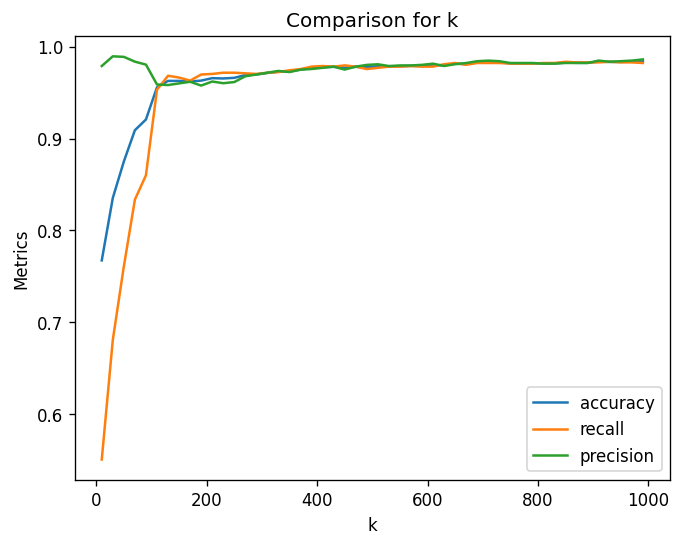

In [5]:
figure = plt.figure(dpi=120)

accuracy_2 = [metrics[0] for metrics in models_metrics_2.values()]
recall_2 = [metrics[1] for metrics in models_metrics_2.values()]
precision_2 = [metrics[2] for metrics in models_metrics_2.values()]

x_2 = [k for k in range(1000)[10::20]]

plt.plot(x_2, accuracy_2, label="accuracy")
plt.plot(x_2, recall_2, label="recall")
plt.plot(x_2, precision_2, label="precision")

plt.title("Comparison for k")
plt.ylabel("Metrics")
plt.xlabel("k")
plt.legend()
plt.savefig("./img/comparison_for_k.png")